Train a neural network on the **`Fuel Economy dataset`** and then explore the effect of the learning rate and batch size on SGD.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

plt.style.use('ggplot')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('data/fuel.csv')

In [58]:
X = df.copy()
y = X.pop('FE') # Remove target

In [59]:
X.head()

,EngDispl,NumCyl,Transmission,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [60]:
preprocessor = make_column_transformer(
    (StandardScaler(), # Guassian distributions, mean ~ 0, var ~ 1
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [61]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [62]:
model.compile(optimizer='adam',loss='mae')

In [63]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200


9/9 [==============================] - 0s 2ms/step - loss: 2.7130
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9626
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5819
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2315
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1786
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1429
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0980
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0707
Epoch 13/200
9/9 [==============================] - 0s 2ms/step - loss: 0

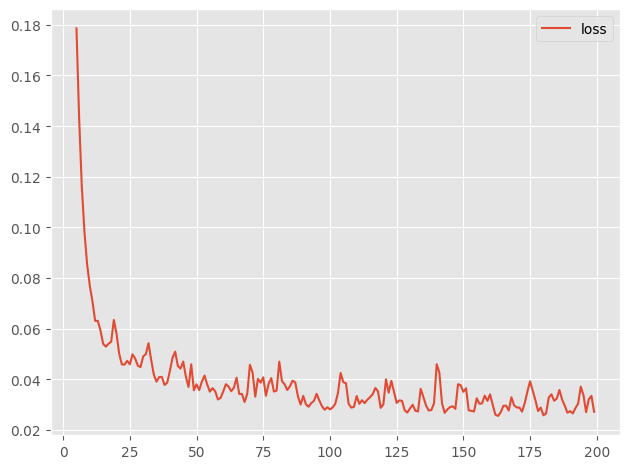

In [64]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

### Evaluate Training

If you trained the model longer, would you expect the loss to decrease further?


With the learning rate and the batch size, you have some control over:
- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

The next cell will generate an animation like the one in the tutorial. Change the values for `learning_rate`, `batch_size`, and `num_examples` (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:

| `learning_rate` | `batch_size` | `num_examples` |
|-----------------|--------------|----------------|
| 0.05            | 32           | 256            |
| 0.05            | 2            | 256            |
| 0.05            | 128          | 256            |
| 0.02            | 32           | 256            |
| 0.2             | 32           | 256            |
| 1.0             | 32           | 256            |
| 0.9             | 4096         | 8192           |
| 0.99            | 4096         | 8192           |